In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Store all provided data here

data = pd.DataFrame([
    ['Вильнюс', 'Брест', 531],
    ['Витебск', 'Брест', 638],
    ['Витебск', 'Вильнюс', 360],
    ['Воронеж', 'Витебск', 869],
    ['Воронеж', 'Волгоград', 581],
    ['Волгоград', 'Витебск', 1455],
    ['Витебск', 'Ниж.Новгород', 911],
    ['Вильнюс', 'Даугавпилс', 211],
    ['Калининград', 'Брест', 699],
    ['Калининград', 'Вильнюс', 333],
    ['Каунас', 'Вильнюс', 102],
    ['Киев', 'Вильнюс', 734],
    ['Киев', 'Житомир', 131],
    ['Житомир', 'Донецк', 863],
    ['Житомир', 'Волгоград', 1493],
    ['Кишинев', 'Киев', 467],
    ['Кишинев', 'Донецк', 812],
    ['С.Петербург', 'Витебск', 602],
    ['С.Петербург', 'Калининград', 739],
    ['С.Петербург', 'Рига', 641],
    ['Москва', 'Казань', 815],
    ['Москва', 'Ниж.Новгород', 411],
    ['Москва', 'Минск', 690],
    ['Москва', 'Донецк', 1084],
    ['Москва', 'С.Петербург', 664],
    ['Мурманск', 'С.Петербург', 1412],
    ['Мурманск', 'Минск', 2238],
    ['Орел', 'Витебск', 522],
    ['Орел', 'Донецк', 709],
    ['Орел', 'Москва', 368],
    ['Одесса', 'Киев', 487],
    ['Рига', 'Каунас', 267],
    ['Таллинн', 'Рига', 308],
    ['Харьков', 'Киев', 471],
    ['Харьков', 'Симферополь', 639],
    ['Ярославль', 'Воронеж', 739],
    ['Ярославль', 'Минск', 940],
    ['Уфа', 'Казань', 525],
    ['Уфа', 'Самара', 461]
], columns = ['CityA', 'CityB', 'Distance'])

variant = (2, 'С.Петербург','Житомир')

In [3]:
cities = np.sort(pd.unique(pd.concat([data['CityA'], data['CityB']], axis = 0)))
cities = np.array(list(enumerate(cities)))

# print all unique cities to check if made a typo
for c in cities:
    print(c)

['0' 'Брест']
['1' 'Вильнюс']
['2' 'Витебск']
['3' 'Волгоград']
['4' 'Воронеж']
['5' 'Даугавпилс']
['6' 'Донецк']
['7' 'Житомир']
['8' 'Казань']
['9' 'Калининград']
['10' 'Каунас']
['11' 'Киев']
['12' 'Кишинев']
['13' 'Минск']
['14' 'Москва']
['15' 'Мурманск']
['16' 'Ниж.Новгород']
['17' 'Одесса']
['18' 'Орел']
['19' 'Рига']
['20' 'С.Петербург']
['21' 'Самара']
['22' 'Симферополь']
['23' 'Таллинн']
['24' 'Уфа']
['25' 'Харьков']
['26' 'Ярославль']


/Users/punctuality/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


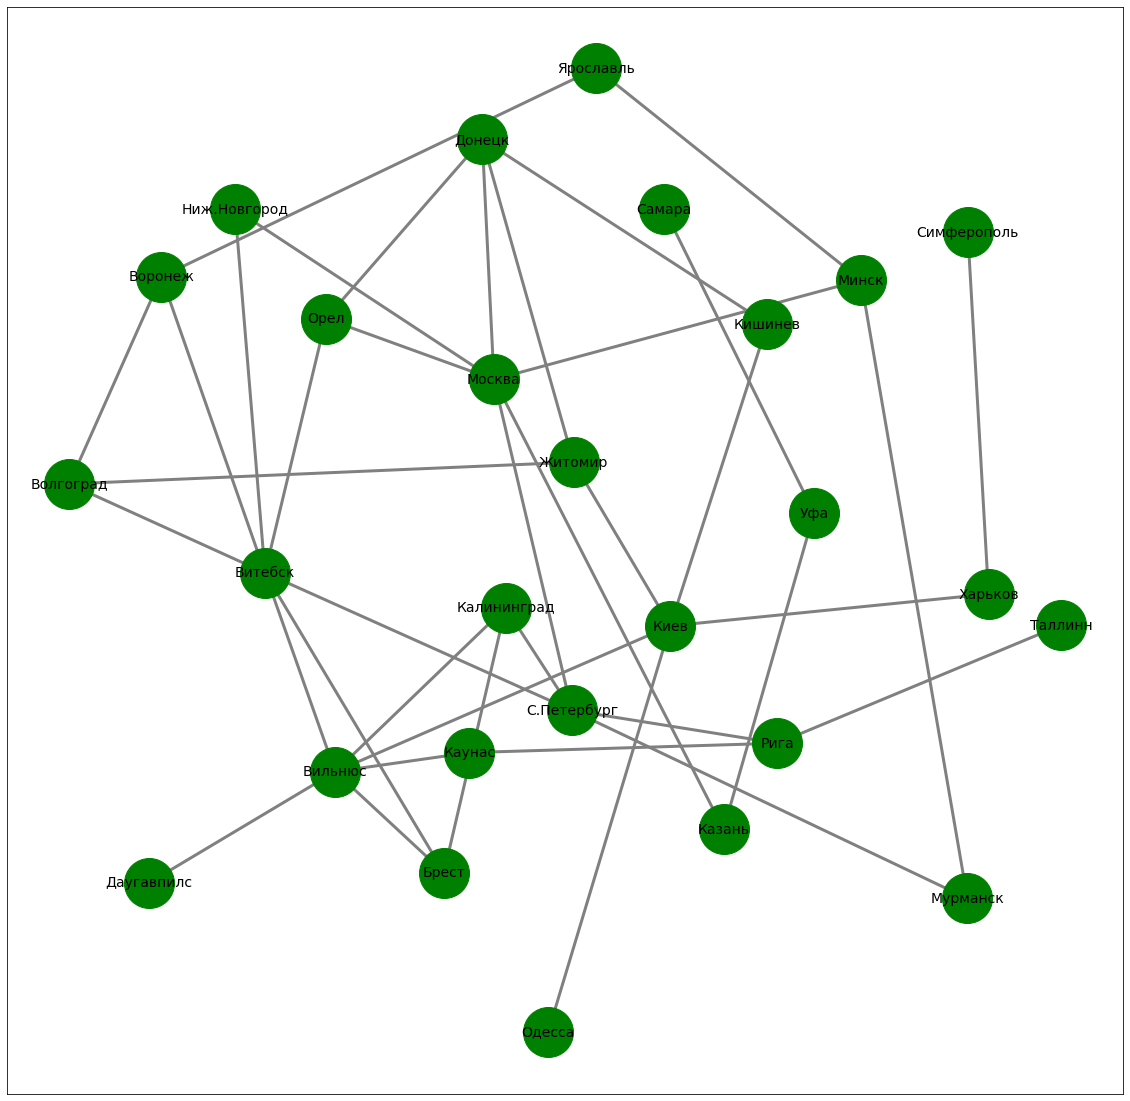

In [4]:
edges = np.array(list(zip([[int(index) for index, c_name in cities if c_name == c][0] for c in data.CityA],
                          [[int(index) for index, c_name in cities if c_name == c][0] for c in data.CityB],
                          1 / data.Distance * 10000)))

plt.figure(figsize=(20, 20))

G = nx.Graph()
G.add_weighted_edges_from(edges)

labelmap = dict(zip(G.nodes(), [[c_name for index, c_name in cities if int(index) == i][0] for i in G.nodes()]))
positions = nx.spring_layout(G, k = 20, seed = 21, iterations=500)

nx.draw_networkx_nodes(G, positions, node_size=2500, node_color='green')
nx.draw_networkx_labels(G, positions, labels = labelmap, font_color='black', font_size=14)
nx.draw_networkx_edges(G, positions, width=3, edge_color='grey')

plt.show()

In [5]:
# Form adjancency_list

adjancency_list = dict.fromkeys(cities[:,1], [])

for (i, row) in data.iterrows():
    adjancency_list[row.CityA] = adjancency_list[row.CityA] + [(row.CityB, row.Distance)]
    adjancency_list[row.CityB] = adjancency_list[row.CityB] + [(row.CityA, row.Distance)]
    
for (city, neighbors) in adjancency_list.items():
    print("{}: {}".format(city, neighbors))

Брест: [('Вильнюс', 531), ('Витебск', 638), ('Калининград', 699)]
Вильнюс: [('Брест', 531), ('Витебск', 360), ('Даугавпилс', 211), ('Калининград', 333), ('Каунас', 102), ('Киев', 734)]
Витебск: [('Брест', 638), ('Вильнюс', 360), ('Воронеж', 869), ('Волгоград', 1455), ('Ниж.Новгород', 911), ('С.Петербург', 602), ('Орел', 522)]
Волгоград: [('Воронеж', 581), ('Витебск', 1455), ('Житомир', 1493)]
Воронеж: [('Витебск', 869), ('Волгоград', 581), ('Ярославль', 739)]
Даугавпилс: [('Вильнюс', 211)]
Донецк: [('Житомир', 863), ('Кишинев', 812), ('Москва', 1084), ('Орел', 709)]
Житомир: [('Киев', 131), ('Донецк', 863), ('Волгоград', 1493)]
Казань: [('Москва', 815), ('Уфа', 525)]
Калининград: [('Брест', 699), ('Вильнюс', 333), ('С.Петербург', 739)]
Каунас: [('Вильнюс', 102), ('Рига', 267)]
Киев: [('Вильнюс', 734), ('Житомир', 131), ('Кишинев', 467), ('Одесса', 487), ('Харьков', 471)]
Кишинев: [('Киев', 467), ('Донецк', 812)]
Минск: [('Москва', 690), ('Мурманск', 2238), ('Ярославль', 940)]
Москва: [

## Required searches

* ### Uninformed Search:

1) Breadth-First Search

2) Depth-First Search

3) Depth-limited search

4) Iterative-deepening depth-first search

5) Bidirectional search

* ### Informed Search:

1) Best-first search

2) **A-star** search

In [6]:
#Breadth-First Search

def bfs(adjancency_list, start, stop):
    visited = [start]
    queue = [(start, 0)]
    
    while queue:
        current = queue.pop(0)
    
        print("{} {} | {}".format(
            "".join(['\t' for i in range(current[1])]), current[1]+1, current[0]), end = " -> ")
        
        for (i, (child, _)) in enumerate(adjancency_list[current[0]]):
            print(child, end = " ")
            if child not in visited:    
                visited.append(child)
                if child == stop:
                    print("!!!", end="")
                    return visited
                queue.append((child, current[1]+1))        
        print()
    return None
    
_ = bfs(adjancency_list, 'С.Петербург', 'Житомир')

 1 | С.Петербург -> Витебск Калининград Рига Москва Мурманск 
	 2 | Витебск -> Брест Вильнюс Воронеж Волгоград Ниж.Новгород С.Петербург Орел 
	 2 | Калининград -> Брест Вильнюс С.Петербург 
	 2 | Рига -> С.Петербург Каунас Таллинн 
	 2 | Москва -> Казань Ниж.Новгород Минск Донецк С.Петербург Орел 
	 2 | Мурманск -> С.Петербург Минск 
		 3 | Брест -> Вильнюс Витебск Калининград 
		 3 | Вильнюс -> Брест Витебск Даугавпилс Калининград Каунас Киев 
		 3 | Воронеж -> Витебск Волгоград Ярославль 
		 3 | Волгоград -> Воронеж Витебск Житомир !!!

In [7]:
#Depth-First Search

def dfs(adjancency_list, start, stop, visited=[], order = 0):
    
    if start not in visited:
        visited.append(start)
        if start == stop:
            print("!!!")
            return visited
        
    for child in set([a for a,_ in adjancency_list[start]]) - set(visited):
            print("{} {} | {} -> {}".format("".join(['  ' for i in range(order)]), order+1, start, child), end=' ')
            if child != stop:
                print()
            res = dfs(adjancency_list, child, stop, visited, order+1)
            if res:
                return res
            
    return None

_ = dfs(adjancency_list, 'С.Петербург', 'Житомир')

 1 | С.Петербург -> Витебск 
   2 | Витебск -> Брест 
     3 | Брест -> Вильнюс 
       4 | Вильнюс -> Даугавпилс 
       4 | Вильнюс -> Киев 
         5 | Киев -> Харьков 
           6 | Харьков -> Симферополь 
         5 | Киев -> Житомир !!!


In [8]:
#Depth-limited Search

def limited_dfs(adjancency_list, start, stop, limit, visited=[], order = 0):
    
    if start not in visited:
        visited.append(start)
        if start == stop:
            print("!!!")
            return visited
        
    if order >= limit:
        return None
        
    for child in set([a for a,_ in adjancency_list[start]]) - set(visited):
            print("{} {} | {} -> {}".format("".join(['  ' for i in range(order)]), order+1, start, child), end=' ')
            if child != stop:
                print()

            res = limited_dfs(adjancency_list, child, stop, limit, visited, order+1)
            if res:
                return res
            
    return None

_ = limited_dfs(adjancency_list, 'С.Петербург', 'Житомир', limit = 5)

 1 | С.Петербург -> Витебск 
   2 | Витебск -> Брест 
     3 | Брест -> Вильнюс 
       4 | Вильнюс -> Даугавпилс 
       4 | Вильнюс -> Киев 
         5 | Киев -> Харьков 
         5 | Киев -> Житомир !!!


In [9]:
#Iterative-Deepening Depth-First Search

def iterative_dfs(adjancency_list, start, stop):
    for cur_limit in range(1, len(adjancency_list) + 1):
        print("Limit = {}".format(cur_limit))
        res = limited_dfs(adjancency_list, start, stop, limit = cur_limit, visited=[])
        if res:
            return res
        
    return None

_ = iterative_dfs(adjancency_list, 'С.Петербург', 'Житомир')

Limit = 1
 1 | С.Петербург -> Витебск 
 1 | С.Петербург -> Мурманск 
 1 | С.Петербург -> Калининград 
 1 | С.Петербург -> Рига 
 1 | С.Петербург -> Москва 
Limit = 2
 1 | С.Петербург -> Витебск 
   2 | Витебск -> Брест 
   2 | Витебск -> Ниж.Новгород 
   2 | Витебск -> Вильнюс 
   2 | Витебск -> Воронеж 
   2 | Витебск -> Орел 
   2 | Витебск -> Волгоград 
 1 | С.Петербург -> Мурманск 
   2 | Мурманск -> Минск 
 1 | С.Петербург -> Калининград 
 1 | С.Петербург -> Рига 
   2 | Рига -> Каунас 
   2 | Рига -> Таллинн 
 1 | С.Петербург -> Москва 
   2 | Москва -> Донецк 
   2 | Москва -> Казань 
Limit = 3
 1 | С.Петербург -> Витебск 
   2 | Витебск -> Брест 
     3 | Брест -> Вильнюс 
     3 | Брест -> Калининград 
   2 | Витебск -> Ниж.Новгород 
     3 | Ниж.Новгород -> Москва 
   2 | Витебск -> Вильнюс 
     3 | Вильнюс -> Даугавпилс 
     3 | Вильнюс -> Киев 
     3 | Вильнюс -> Каунас 
   2 | Витебск -> Воронеж 
     3 | Воронеж -> Ярославль 
     3 | Воронеж -> Волгоград 
   2 | Витеб

In [10]:
#Bidirectional Search

def bds(adjancency_list, start, stop):
    visited_f = [start]
    queue_f = [(start, 0)]
    
    visited_b = [stop]
    queue_b = [(stop, 0)]
    
    while queue_f and queue_b:
        current_f = queue_f.pop(0)
        current_b = queue_b.pop(0)
    
        print("{} {} Forward | {}".format(
            "".join(['\t' for i in range(current_f[1])]), current_f[1]+1, current_f[0]), end = " -> ")
        
        for (i, (child, _)) in enumerate(adjancency_list[current_f[0]]):
            print(child, end = " ")
            if child not in visited_f:    
                visited_f.append(child)
                queue_f.append((child, current_f[1]+1))        

        print()
        print("{} {} Back    | {}".format(
            "".join(['\t' for i in range(current_b[1])]), current_b[1]+1, current_b[0]), end = " -> ")
    
        for (i, (child, _)) in enumerate(adjancency_list[current_b[0]]):
            print(child, end = " ")
            if child not in visited_b:    
                visited_b.append(child)
                queue_b.append((child, current_b[1]+1))        
        print()
        
        intersection = list(set(visited_f) & set(visited_b))
        if intersection:
            print("\n{} !!!".format(" OR ".join(intersection)))
            return (visited_f, visited_b)
        else:
            print()
    
    return None

_ = bds(adjancency_list, 'С.Петербург', 'Житомир')

 1 Forward | С.Петербург -> Витебск Калининград Рига Москва Мурманск 
 1 Back    | Житомир -> Киев Донецк Волгоград 

	 2 Forward | Витебск -> Брест Вильнюс Воронеж Волгоград Ниж.Новгород С.Петербург Орел 
	 2 Back    | Киев -> Вильнюс Житомир Кишинев Одесса Харьков 

Вильнюс OR Волгоград !!!


In [11]:
#Informed Search Data

#Direct distance for Житомир, picked by variant.
zhitomir_data = {
#   From    : Direct Distance
    'Брест' : 395,
    'Вильнюс' : 543,
    'Витебск' : 553,
    'Волгоград' : 1155,
    'Воронеж' : 754 ,
    'Даугавпилс' : 641,
    'Донецк' : 709 ,
    'Житомир' : 0,
    'Казань' : 1496,
    'Калининград' : 740,
    'Каунас' : 607,
    'Киев' : 131,
    'Кишинев' : 362,
    'Минск' : 411,
    'Москва' : 854,
    'Мурманск' : 2094,
    'Ниж.Новгород' : 1218,
    'Одесса' : 446,
    'Орел' : 592,
    'Рига' : 801,
    'С.Петербург' : 1081,
    'Самара' : 1507,
    'Симферополь' : 703,
    'Таллинн' : 1050,
    'Уфа' : 1899,
    'Харьков' : 542,
    'Ярославль' : 1097
}

In [12]:
#Best-First Search

def best_fs(adjancency_list, start, stop, f_n: dict):
    visited = [start]
    current = start
    counter = 0
    
    while current:
        counter += 1
        
        if current == stop:
            print("!!!", end="")
            return visited
        
        print("{}\t| {}".format(counter, current), end = " -> ")
        
        heuristic_vals = []
        
        for (i, (child, _)) in enumerate(adjancency_list[current]):
            heuristic_val = f_n[child]
            heuristic_vals.append((child, heuristic_val))
            
            print("{}:{}".format(child, heuristic_val), end = " ")

        heuristic_vals.sort(key= lambda x: x[1])
        
        
        for (next_candidate, _) in heuristic_vals:
            if next_candidate not in visited:
                visited.append(next_candidate)
                current = next_candidate
                break
                
        print()
    return None

_ = best_fs(adjancency_list, 'Москва', 'Житомир', zhitomir_data)

1	| Москва -> Казань:1496 Ниж.Новгород:1218 Минск:411 Донецк:709 С.Петербург:1081 Орел:592 
2	| Минск -> Москва:854 Мурманск:2094 Ярославль:1097 
3	| Ярославль -> Воронеж:754 Минск:411 
4	| Воронеж -> Витебск:553 Волгоград:1155 Ярославль:1097 
5	| Витебск -> Брест:395 Вильнюс:543 Воронеж:754 Волгоград:1155 Ниж.Новгород:1218 С.Петербург:1081 Орел:592 
6	| Брест -> Вильнюс:543 Витебск:553 Калининград:740 
7	| Вильнюс -> Брест:395 Витебск:553 Даугавпилс:641 Калининград:740 Каунас:607 Киев:131 
8	| Киев -> Вильнюс:543 Житомир:0 Кишинев:362 Одесса:446 Харьков:542 
!!!

In [13]:
#A* Search

def astar_s(adjancency_list, start, stop, f_n: dict):
    #         pos    g  h  f  order
    
    queue = [(start, 0, 0, 0, 0)]
    visited = []
    counter = 0
    while queue:
        counter += 1
        
        queue.sort(key= lambda x: x[3])
        current = queue.pop(0)
        
        if current[0] not in visited:
            visited.append(current[0])
            
        if current[0] == stop:
            return visited
        
        print("{}{} | {}".format("".join(['\t' for i in range(current[4])]) ,counter, current[0]), end = " -> ")
        
        children = adjancency_list[current[0]]
        
        for (child, distance) in children:
            
            sum_distance = current[1] + distance
            heuristics = f_n[child]
            child_node = (child, sum_distance, heuristics, sum_distance + heuristics, current[4] + 1)
            
            if child in visited:
                continue
            
            print("{}:{}".format(child, child_node[3]), end = " ")
            if child == stop:
                print("!!! ", end="")
            
            if False in [not (node == child and child_node[3] > f) for (node, _, _, f, _) in queue]:
                continue
            else:
                queue.append(child_node)
                
        print()
        
    return None
                
_ = astar_s(adjancency_list, 'С.Петербург', 'Житомир', zhitomir_data)

1 | С.Петербург -> Витебск:1155 Калининград:1479 Рига:1442 Москва:1518 Мурманск:3506 
	2 | Витебск -> Брест:1635 Вильнюс:1505 Воронеж:2225 Волгоград:3212 Ниж.Новгород:2731 Орел:1716 
	3 | Рига -> Каунас:1515 Таллинн:1999 
	4 | Калининград -> Брест:1833 Вильнюс:1615 
		5 | Вильнюс -> Брест:1888 Даугавпилс:1814 Каунас:1671 Киев:1827 
		6 | Каунас -> 
	7 | Москва -> Казань:2975 Ниж.Новгород:2293 Минск:1765 Донецк:2457 Орел:1624 
		8 | Орел -> Донецк:2450 
		9 | Брест -> 
		10 | Орел -> Донецк:2542 
		11 | Минск -> Мурманск:5686 Ярославль:3391 
			12 | Даугавпилс -> 
			13 | Киев -> Житомир:1827 !!! Кишинев:2525 Одесса:2629 Харьков:2709 
